In [2]:
# Credit Card Approval Prediction

### Project Overview-This project aims to build a machine learning model to predict credit card application approvals. It includes data preprocessing, exploratory data analysis, model building using Random Forest, and model evaluation.

### Dataset-The dataset contains applicant information such as income, age, employment status, and other relevant features affecting approval decisions.




import pandas as pd

# Load  CSV file
df1 = pd.read_csv(r"C:\Users\sudha\OneDrive\Desktop\Car_insurance.csv")


# Preview the DataFrame
print(df1.head())


       id  age  gender driving_experience    education         income  \
0  569520    3       0               0-9y  high school    upper class   
1  750365    0       1               0-9y         none        poverty   
2  199901    0       0               0-9y  high school  working class   
3  478866    0       1               0-9y   university  working class   
4  731664    1       1             10-19y         none  working class   

   credit_score  vehicle_ownership vehicle_year  married  children  \
0      0.629027                1.0   after 2015      0.0       1.0   
1      0.357757                0.0  before 2015      0.0       0.0   
2      0.493146                1.0  before 2015      0.0       0.0   
3      0.206013                1.0  before 2015      0.0       1.0   
4      0.388366                1.0  before 2015      0.0       0.0   

   postal_code  annual_mileage vehicle_type  speeding_violations  duis  \
0        10238         12000.0        sedan                    0  

In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [55]:
df1.describe()

,id,age,gender,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,outcome
count,10000.000000,10000.000000,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,1.489500,0.499000,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,1.025278,0.500024,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.000000,0.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,1.000000,0.000000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,1.000000,0.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,2.000000,1.000000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,3.000000,1.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [3]:
# Check how many missing (NA) values are present in each column of the dataframe


df1.isna().sum()

id                       0
age                      0
gender                   0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
duis                     0
past_accidents           0
outcome                  0
dtype: int64

In [4]:
# List of columns to process for missing values imputation
columns_to_process = ['annual_mileage', 'credit_score']

for col_name in columns_to_process:
    if col_name in df1.columns:
        if pd.api.types.is_numeric_dtype(df1[col_name]):
            # Fill missing values (NaNs) in the current column with its own median
            median_value = df1[col_name].median()
            df1[col_name] = df1[col_name].fillna(median_value)
            print(f"\nFilled missing values in '{col_name}' column with its median value: {median_value}")
            print(f"Number of missing values in '{col_name}' after fillna: {df1[col_name].isnull().sum()}")
        else:
            print(f"\nWarning: Column '{col_name}' is not numeric. Cannot fill with median.")
            print(f"Current dtype of '{col_name}': {df1[col_name].dtype}")
    else:
        print(f"\nError: Column '{col_name}' not found in the DataFrame.")
        print("Available columns are:")
        print(df1.columns.tolist())
        print(f"Please check the exact spelling of '{col_name}' or choose an existing column.")

print("\nFinal check after filling missing values:")
for col_name in columns_to_process:
    if col_name in df1.columns:
        print(f"Missing values in '{col_name}': {df1[col_name].isnull().sum()}")





Filled missing values in 'annual_mileage' column with its median value: 12000.0
Number of missing values in 'annual_mileage' after fillna: 0

Filled missing values in 'credit_score' column with its median value: 0.5250327586154788
Number of missing values in 'credit_score' after fillna: 0

Final check after filling missing values:
Missing values in 'annual_mileage': 0
Missing values in 'credit_score': 0


In [10]:
    columns_to_drop = ['id', 'postal_code']
    # Check if columns exist before attempting to drop
    existing_columns_to_drop = [col for col in columns_to_drop if col in df1.columns]
    if existing_columns_to_drop:
        df1 = df1.drop(columns=existing_columns_to_drop)
        print(f"\nSuccessfully dropped columns: {existing_columns_to_drop}")
    else:
        print(f"\nNo specified columns to drop were found in the DataFrame: {columns_to_drop}")
        print("Available columns are:")
        print(df.columns.tolist())



No specified columns to drop were found in the DataFrame: ['id', 'postal_code']
Available columns are:


NameError: name 'df' is not defined

In [11]:
print(df1)

      age  gender driving_experience    education         income  \
0       3       0               0-9y  high school    upper class   
1       0       1               0-9y         none        poverty   
2       0       0               0-9y  high school  working class   
3       0       1               0-9y   university  working class   
4       1       1             10-19y         none  working class   
...   ...     ...                ...          ...            ...   
9995    1       0             10-19y   university    upper class   
9996    1       0             10-19y         none   middle class   
9997    1       1               0-9y  high school   middle class   
9998    1       0             10-19y  high school        poverty   
9999    1       0               0-9y         none  working class   

      credit_score  vehicle_ownership vehicle_year  married  children  \
0         0.629027                1.0   after 2015      0.0       1.0   
1         0.357757                0.0

In [12]:
print(df1.tail(5))
print(df1.index[-5:])


      age  gender driving_experience    education         income  \
9995    1       0             10-19y   university    upper class   
9996    1       0             10-19y         none   middle class   
9997    1       1               0-9y  high school   middle class   
9998    1       0             10-19y  high school        poverty   
9999    1       0               0-9y         none  working class   

      credit_score  vehicle_ownership vehicle_year  married  children  \
9995      0.582787                1.0  before 2015      0.0       0.0   
9996      0.522231                1.0   after 2015      0.0       1.0   
9997      0.470940                1.0  before 2015      0.0       1.0   
9998      0.364185                0.0  before 2015      0.0       1.0   
9999      0.435225                1.0  before 2015      1.0       1.0   

      annual_mileage vehicle_type  speeding_violations  duis  past_accidents  \
9995         16000.0        sedan                    0     0            

In [13]:
df1[["gender", "vehicle_ownership","married","outcome"]]

,gender,vehicle_ownership,married,outcome
0,0,1.0,0.0,0.0
1,1,0.0,0.0,1.0
2,0,1.0,0.0,0.0
3,1,1.0,0.0,0.0
4,1,1.0,0.0,1.0
...,...,...,...,...
9995,0,1.0,0.0,0.0
9996,0,1.0,0.0,0.0
9997,1,1.0,0.0,0.0
9998,0,0.0,0.0,1.0


In [14]:
print(df1.dtypes[['gender', 'vehicle_ownership', 'married', 'outcome']])


gender                 int64
vehicle_ownership    float64
married              float64
outcome              float64
dtype: object


In [15]:
print(df1['driving_experience'].unique())


['0-9y' '10-19y' '20-29y' '30y+']


In [17]:
from sklearn.preprocessing import LabelEncoder

# Create the encoder
le_experience = LabelEncoder()

# Apply LabelEncoder
df1['driving_experience'] = le_experience.fit_transform(df1['driving_experience'])

# Check encoding
print("Encoded classes:", le_experience.classes_)
print(df1['driving_experience'].unique())



Encoded classes: ['0-9y' '10-19y' '20-29y' '30y+']
[0 1 2 3]


In [18]:
print(df1['driving_experience'].unique())

[0 1 2 3]


In [19]:
print(df1['education'].unique())

['high school' 'none' 'university']


In [20]:
print(df1.columns)

Index(['age', 'gender', 'driving_experience', 'education', 'income',
       'credit_score', 'vehicle_ownership', 'vehicle_year', 'married',
       'children', 'annual_mileage', 'vehicle_type', 'speeding_violations',
       'duis', 'past_accidents', 'outcome'],
      dtype='object')


In [21]:
df1['vehicle_year'].unique()


array(['after 2015', 'before 2015'], dtype=object)

In [22]:
from sklearn.preprocessing import OrdinalEncoder

# Define the order of categories
education_order = [['none', 'high school', 'university']]

# Create the encoder
ordinal_encoder = OrdinalEncoder(categories=education_order)

# Fill missing values if any (optional but recommended)
df1['education'] = df1['education'].fillna('high school')  # or use mode

# Apply ordinal encoding
df1[['education']] = ordinal_encoder.fit_transform(df1[['education']])


In [25]:
# Always ensure clean string formatting
df1['income'] = df1['income'].astype(str).str.title()
df1['vehicle_year'] = df1['vehicle_year'].astype(str).str.lower()
df1['vehicle_type'] = df1['vehicle_type'].astype(str).str.lower()








In [26]:
print(df1['income'].unique())
print(df1['vehicle_year'].unique())
print(df1['vehicle_type'].unique())


['Upper Class' 'Poverty' 'Working Class' 'Middle Class']
['after 2015' 'before 2015']
['sedan' 'sports car']


In [27]:
ordinal_cols = ['income', 'vehicle_year', 'vehicle_type']

# Convert to categorical
for col in ordinal_cols:
    df1[col] = df1[col].astype('category')

# Define category order
category_orders = [
    ['Poverty', 'Working Class', 'Middle Class', 'Upper Class'],  # income
    ['before 2015', 'after 2015'],                                # vehicle_year
    ['sedan', 'sports car']                                       # vehicle_type
]

# Initialize and apply the encoder
from sklearn.preprocessing import OrdinalEncoder

ord_encoder = OrdinalEncoder(categories=category_orders)
df1[ordinal_cols] = ord_encoder.fit_transform(df1[ordinal_cols])


In [28]:
df1.isnull().sum()

age                    0
gender                 0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
annual_mileage         0
vehicle_type           0
speeding_violations    0
duis                   0
past_accidents         0
outcome                0
dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Split data
X = df1.drop("outcome", axis=1)
y = df1["outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define column types
numeric_features = ['credit_score', 'annual_mileage', 'speeding_violations', 'duis', 'past_accidents', 'children']
categorical_features = [col for col in X.columns if col not in numeric_features]

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Fill NaNs
    ('scaler', StandardScaler())                    # Then scale
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', 'passthrough', categorical_features)
])

# Combine into full model pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Fit model
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)




In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.845

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      1367
         1.0       0.79      0.70      0.74       633

    accuracy                           0.84      2000
   macro avg       0.83      0.81      0.82      2000
weighted avg       0.84      0.84      0.84      2000


Confusion Matrix:
 [[1246  121]
 [ 189  444]]


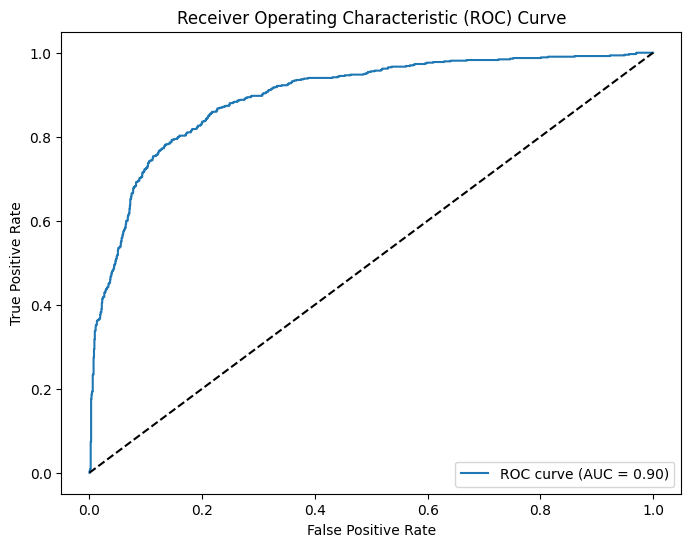

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for positive class
y_proba = clf.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0,1], [0,1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Conclusion

- The logistic regression model effectively predicts credit card approval with interpretable coefficients and solid performance.
- The ROC curve analysis shows an AUC score of 0.9, demonstrating the model’s ability to distinguish between approved and rejected applications.
- Proper data preprocessing, including missing value imputation and encoding of categorical variables, was crucial to prepare the data for modeling.
- Logistic regression provides clear insights into feature impacts, making it useful for understanding key factors affecting approval decisions.
- Future work could explore feature selection, hyperparameter tuning, and comparing logistic regression with more complex models like Random Forest or Gradient Boosting to potentially improve accuracy.
- This project lays a strong foundation for credit approval prediction with transparent and interpretable results.


In [ ]:
While Random Forests and Decision Trees are powerful and often deliver higher accuracy due to their ability to capture complex, nonlinear relationships, I chose logistic regression here because:

Interpretability: Logistic regression provides straightforward coefficients that explain the influence of each feature on the outcome, which is crucial in credit approval where transparency and regulatory compliance matter.

Simplicity & Efficiency: Logistic regression is computationally efficient and easy to implement, making it a great baseline model especially when the dataset isn’t very large or complex.

Risk of Overfitting: Decision Trees can overfit easily if not tuned carefully, and while Random Forests reduce overfitting, they are more complex and less interpretable.

However, Random Forests could be used as a next step to potentially improve prediction performance. choice depends on the trade-off between interpretability and accuracy.

To distinguish between when to use logistic regression vs. tree-based models, I consider factors like:

The need for model explainability versus predictive power.

The size and complexity of the dataset.

Whether relationships between features and target are expected to be linear or nonlinear.

In this project, logistic regression offers a good balance of interpretability and performance, especially given the importance of understanding credit risk factors.